# Numpy Cheat Sheets : 

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

https://s3.amazonaws.com/dq-blog-files/numpy-cheat-sheet.pdf

In [1]:
# change the Current Working Directory using os.chdir()
import os
from pathlib import Path
os.chdir('E:\\Eric\\Programmation\\Python\\OUIC\\Data Analysis\\data\\Wine')
Path.cwd()

WindowsPath('E:/Eric/Programmation/Python/OUIC/Data Analysis/data/Wine')

## The wines we’ll be analyzing are from the Minho region of Portugal.
The data was downloaded from the UCI Machine Learning Repository, and is available here : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

#### The data is in what I’m going to call ssv (semicolon separated values) format
each record is separated by a semicolon (;), and rows are separated by a new line

In [29]:
import csv
with open('winequality-red.csv', 'r') as f:
    wines = list(csv.reader(f, delimiter=';'))

In [30]:
print(wines[:3])

[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], ['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5']]


each item in the entire list of lists is represented as a string, which will make it harder to do computations

We’ll format the data into a table to make it easier to view:

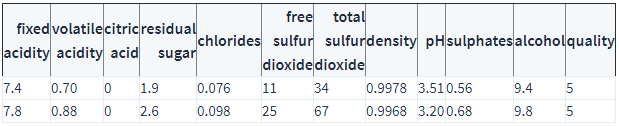

In [31]:
# find the average quality of the wines
qualities = [float(item[-1]) for item in wines[1:]]
sum(qualities) / len(qualities)

5.6360225140712945

One of the limitations of NumPy is that all the elements in an array have to be of the same type, so if we include the header row, all the elements in the array will be read in as strings. Because we want to be able to do computations like find the average quality of the wines, we need the elements to all be floats

In [32]:
import csv
with open("winequality-red.csv", 'r') as f:
    wines = list(csv.reader(f, delimiter=";"))
import numpy as np
wines = np.array(wines[1:], dtype=np.float)
wines.shape

(1599, 12)

#### autre méthode

In [33]:
# create an array with all zero elements in cases when you need an array of fixed size
import numpy as np

empty_array = np.zeros((3,4))

empty_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [34]:
# create an array where each element is a random number
# can be useful when you want to quickly test your code with sample arrays
np.random.rand(3,4)

array([[0.59054505, 0.760695  , 0.61154922, 0.57387947],
       [0.88662222, 0.50837426, 0.44357057, 0.87625138],
       [0.50636979, 0.54971246, 0.27389729, 0.51809911]])

In [35]:
# Using NumPy To Read In Files
wines = np.genfromtxt("winequality-red.csv", delimiter=";", skip_header=1)

One important thing to keep in mind is that just like Python lists, NumPy is zero-indexed, meaning that the index of the first row is 0, and the index of the first column is 0. If we want to work with the 4th row, we’d use index 3

Let’s select the element at row 3 and column 4. In the below code, we pass in the index 2 as the row index, and the index 3 as the column index

In [36]:
wines[2,3]

2.3

In [12]:
# Slicing NumPy Arrays
# If we instead want to select the first 3 items from the 4th column
wines[0:3,3]

array([1.9, 2.6, 2.3])

In [13]:
# We can select an entire column
wines[:,3]

array([1.9, 2.6, 2.3, ..., 2.3, 2. , 3.6])

In [14]:
# we can also extract an entire row
wines[3,:]

array([11.2  ,  0.28 ,  0.56 ,  1.9  ,  0.075, 17.   , 60.   ,  0.998,
        3.16 ,  0.58 ,  9.8  ,  6.   ])

In [ ]:
# change a value
wines[1,5] = 10

In [20]:
third_wine = wines[3,:]
print(third_wine)

[11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16   0.58
  9.8    6.   ]


In [37]:
third_wine[1]

0.28

The store earned 500 € in January, 505 € in February, and so on. We can split up these earnings by quarter into a list of lists:
We can retrieve the earnings from January by calling year_one[0][0]. If we want the results for a whole quarter, we can call year_one[0] or year_one[1].

In [38]:
year_one = [
    [500,505,490],
    [810,450,678],
    [234,897,430],
    [560,1023,640]
]

we now want to add the results from another year? We have to add a third dimension:
We can retrieve the earnings from January of the first year by calling earnings[0][0][0]. We now need three indexes to retrieve a single element

In [39]:
earnings = [
    [
        [500,505,490],
        [810,450,678],
        [234,897,430],
        [560,1023,640]
    ],
    [
        [600,605,490],
        [345,900,1000],
        [780,730,710],
        [670,540,324]
    ]
]

In [40]:
earnings = np.array(earnings)
earnings[0,0,0]

500

In [41]:
earnings.shape

(2, 4, 3)

In [42]:
# to get first quarter earnings from both years, we could do this:
earnings[:,0,:]

array([[500, 505, 490],
       [600, 605, 490]])

In [43]:
# find the data type of a NumPy array by accessing the dtype property:
wines.dtype

dtype('float64')

### Converting Data Types

In [46]:
# we can convert wines to the int data type
int_wines = wines.astype(int) # converts to 64 bits int, but takes up more space in memory
int_wines = wines.astype(np.int32) # converts to 32 bits int
print(int_wines)

[[ 7  0  0 ...  0  9  5]
 [ 7  0  0 ...  0  9  5]
 [ 7  0  0 ...  0  9  5]
 ...
 [ 6  0  0 ...  0 11  6]
 [ 5  0  0 ...  0 10  5]
 [ 6  0  0 ...  0 11  6]]


In [45]:
int_wines.dtype.name

'int32'

In [48]:
# Multiple Array Math
wines[:,8] + wines[:,11]

array([8.51, 8.2 , 8.26, ..., 9.42, 8.57, 9.39])

In [49]:
wines[:,10] * wines[:,11]

array([47., 49., 49., ..., 66., 51., 66.])

## NumPy Array Methods

In [50]:
wines[:,11].sum()

9012.0

This may seem backwards that the sums over the first axis would give us the sum of each column, but one way to think about this is that the specified axis is the one “going away”. So if we specify axis=0, we want the rows to go away, and we want to find the sums for each of the remaining axes

In [51]:
#  total of each columns
wines.sum(axis=0)

array([13303.1    ,   843.985  ,   433.29   ,  4059.55   ,   139.859  ,
       25384.     , 74302.     ,  1593.79794,  5294.47   ,  1052.38   ,
       16666.35   ,  9012.     ])

If we pass in axis=1, we’ll find the sums over the second axis of the array. This will give us the sum of each row:

In [52]:
#  total of each rows
wines.sum(axis=1)

array([ 74.5438 , 123.0548 ,  99.699  , ..., 100.48174, 105.21547,
        92.49249])

There are several other methods that behave like the sum method, including:


numpy.ndarray.mean — finds the mean of an array.

numpy.ndarray.std — finds the standard deviation of an array.

numpy.ndarray.min — finds the minimum value in an array.

numpy.ndarray.max — finds the maximum value in an array.


You can find a full list of array methods here : https://numpy.org/doc/stable/reference/arrays.ndarray.html

## NumPy Array Comparisons
NumPy makes it possible to test to see if rows match certain values using mathematical comparison operations like <, >, >=, <=, and ==. For example, if we want to see which wines have a quality rating higher than 5, we can do this:

In [53]:
wines[:,11] > 5

array([False, False, False, ...,  True, False,  True])

## Subsetting
One of the powerful things we can do with a Boolean array and a NumPy array is select only certain rows or columns in the NumPy array. For example, the below code will only select rows in wines where the quality is over 7:

In [55]:
high_quality = wines[:,11] > 7
wines[high_quality,:][:3,:]

array([[7.900e+00, 3.500e-01, 4.600e-01, 3.600e+00, 7.800e-02, 1.500e+01,
        3.700e+01, 9.973e-01, 3.350e+00, 8.600e-01, 1.280e+01, 8.000e+00],
       [1.030e+01, 3.200e-01, 4.500e-01, 6.400e+00, 7.300e-02, 5.000e+00,
        1.300e+01, 9.976e-01, 3.230e+00, 8.200e-01, 1.260e+01, 8.000e+00],
       [5.600e+00, 8.500e-01, 5.000e-02, 1.400e+00, 4.500e-02, 1.200e+01,
        8.800e+01, 9.924e-01, 3.560e+00, 8.200e-01, 1.290e+01, 8.000e+00]])

we can look for wines with a lot of alcohol and high quality. In order to specify multiple conditions, we have to place each condition in parentheses, and separate conditions with an ampersand (&):

In [56]:
high_quality_and_alcohol = (wines[:,10] > 10) & (wines[:,11] > 7)
wines[high_quality_and_alcohol,10:]

array([[12.8,  8. ],
       [12.6,  8. ],
       [12.9,  8. ],
       [13.4,  8. ],
       [11.7,  8. ],
       [11. ,  8. ],
       [11. ,  8. ],
       [14. ,  8. ],
       [12.7,  8. ],
       [12.5,  8. ],
       [11.8,  8. ],
       [13.1,  8. ],
       [11.7,  8. ],
       [14. ,  8. ],
       [11.3,  8. ],
       [11.4,  8. ]])

In [57]:
# transpose an array with np.transpose() = inverser les axes x et y
print(wines.shape)
print(np.transpose(wines).shape)

(1599, 12)
(12, 1599)


In [59]:
# We can use the numpy.ravel function to turn an array into a one-dimensional representation.
# It will essentially flatten an array into a long sequence of values
array_one = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ]
)
array_one.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [60]:
# we can use the numpy.reshape function to reshape an array to a certain shape we specify.
# The below code will turn the second row of wines into a 2-dimensional array with 2 rows and 6 columns:
wines[1,:].reshape((2,6))

array([[ 7.8   ,  0.88  ,  0.    ,  2.6   ,  0.098 , 25.    ],
       [67.    ,  0.9968,  3.2   ,  0.68  ,  9.8   ,  5.    ]])

# Combining NumPy Arrays

With NumPy, it’s very common to combine multiple arrays into a single unified array. We can use `numpy.vstack` to vertically stack multiple arrays. Think of it like the second arrays’s items being added as new rows to the first array. We can read in the winequality-white.csv dataset that contains information on the quality of white wines, then combine it with our existing dataset, wines, which contains information on red wines.

In [63]:
red_wines = np.genfromtxt("winequality-red.csv", delimiter=";", skip_header=1)
white_wines = np.genfromtxt("winequality-white.csv", delimiter=";", skip_header=1)
print(red_wines.shape)
print(white_wines.shape)
all_wines = np.vstack((red_wines, white_wines))
print(all_wines.shape)

(1599, 12)
(4898, 12)
(6497, 12)


If we want to combine arrays horizontally, where the number of rows stay constant, but the columns are joined, then we can use the numpy.hstack function. The arrays we combine need to have the same number of rows for this to work.

Finally, we can use numpy.concatenate as a general purpose version of hstack and vstack. If we want to concatenate two arrays, we pass them into concatenate, then specify the axis keyword argument that we want to concatenate along. Concatenating along the first axis is similar to vstack, and concatenating along the second axis is similar to hstack:

In [64]:
np.concatenate((red_wines, white_wines), axis=0)

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])